# Business Case: Walmart - Confidence Interval and CLT

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

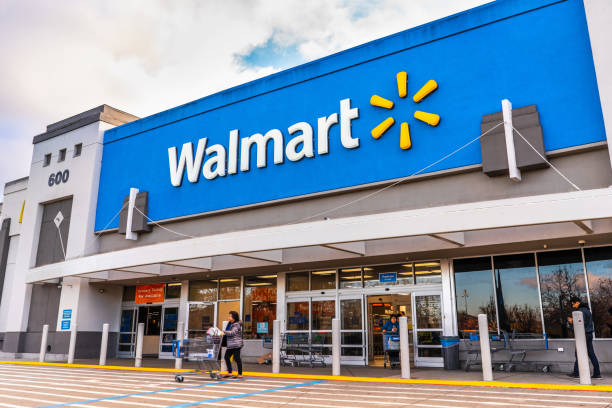

### Business Problem:

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Dataset Information:
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.
#### Source:
Please check the dataset at: "[Dataset Link](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094)"

#### Feature Information:
* **User_ID:** User ID
* **Product_ID:** Product ID
* **Gender:** 	Sex of User(Male/Female)
* **Age:** Age in bins
* **Occupation:** Occupation(Masked)
* **City_Category:** Category of the City (A,B,C)
* **StayInCurrentCityYears:** Number of years stay in current city
* **Marital_Status:** Marital Status
* **ProductCategory:**	Product Category (Masked)
* **Purchase:**	Purchase Amount

## Loading the "walmart_data.csv" Dataset:
For exploring and analysing first we import the Python libraries like numpy,pandas,matplotlib,Seaborn,Scipy and then import the "walmart_data.csv" dataset and save it in a dataframe "data".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from scipy.stats import binom, norm, poisson, geom, expon

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [5]:
data.shape

(550068, 10)

## Basic Exploration of Data:

In [6]:
# getting the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [12]:
# Converting the dtype of categorical features 'User_ID', 'Marital_Status', 'Occupation', 'Product_Category' from int to object

cols = ['User_ID', 'Marital_Status', 'Occupation', 'Product_Category']
for col in cols:
    data[col] = data[col].astype("O")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [9]:
# checking for null values

data.isna().sum()

* There is no missing values in the dataset.

In [10]:
# checking for duplicate rows

data.duplicated().sum()

* There is no duplicate rows in the dataset.

### Statistical summary of data:

In [7]:
data_num = data[['Purchase']]
data_num.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


- There is difference in mean and median Purchase.So Purchase may have outliers.

In [14]:
data.describe(include = 'object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


- The most frequent age group is '26-35'.
- The most common city category is 'B'.
- The most common product category is '5'.

## Univariate Analysis:

In [60]:
data['User_ID'].nunique()

5891

In [61]:
data['Product_ID'].nunique()

3631

* There are 5891 users and 3631 products in the dataset. 

In [62]:
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

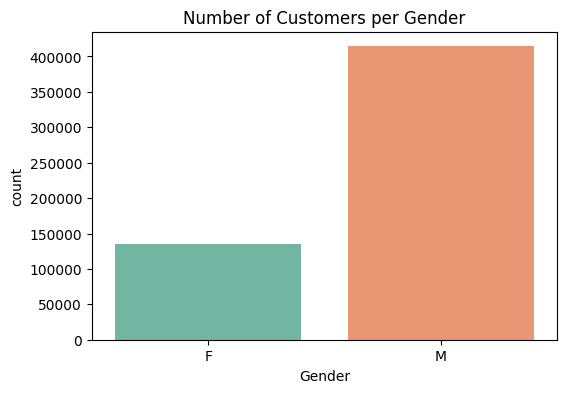

In [63]:
plt.figure(figsize = (6,4))
sns.countplot(data = data, x = 'Gender', palette = 'Set2')
plt.title("Number of Customers per Gender")
plt.show()

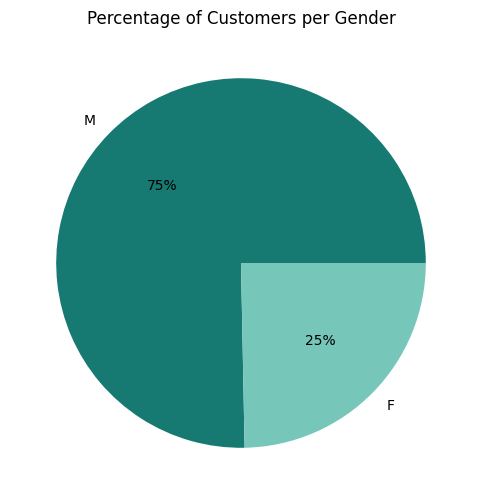

In [64]:
plt.figure(figsize=(12, 6))
df = data['Gender'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
plt.pie(x=df.values, labels=df.index, autopct='%.0f%%', colors=palette_color)
plt.title("Percentage of Customers per Gender")
plt.show()

* 75% of the users are Male and 25% are Female.

In [65]:
data['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

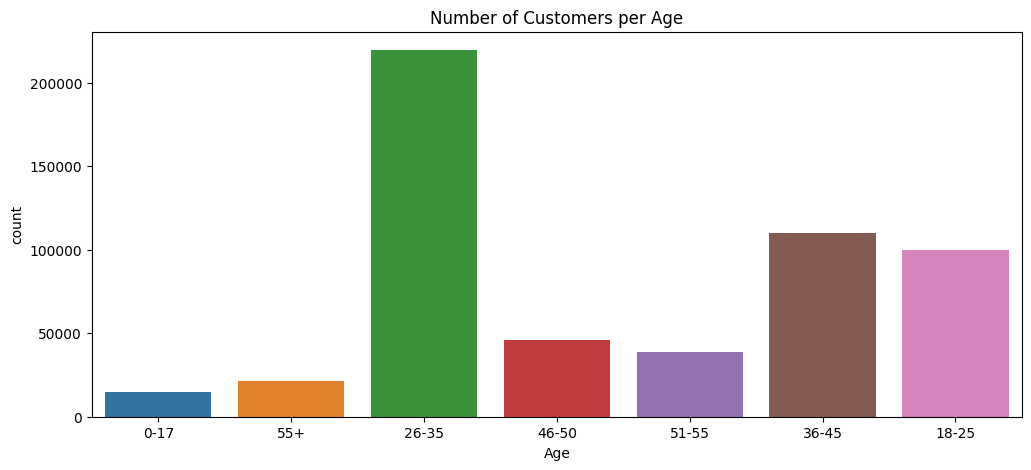

In [66]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='Age')
plt.title("Number of Customers per Age")
plt.show()

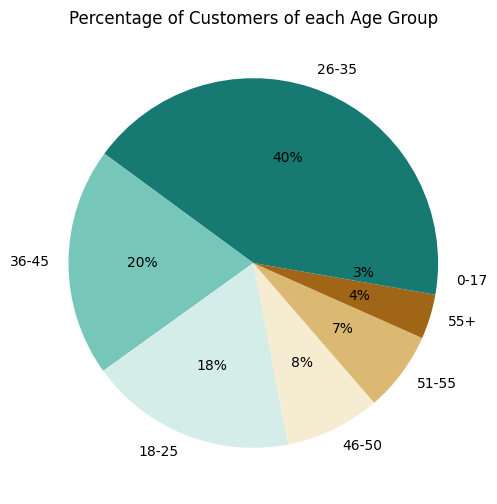

In [67]:
plt.figure(figsize=(12, 6))
df = data['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
plt.pie(x=df.values, labels=df.index, autopct='%.0f%%', colors=palette_color)
plt.title("Percentage of Customers of each Age Group")
plt.show()

* 86% of the users are between the age 18-50 (18%: 18-25, 40%: 26-35, 20%: 36-45, 8%: 46-50).

In [68]:
data['Occupation'].nunique()

21

In [69]:
data['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

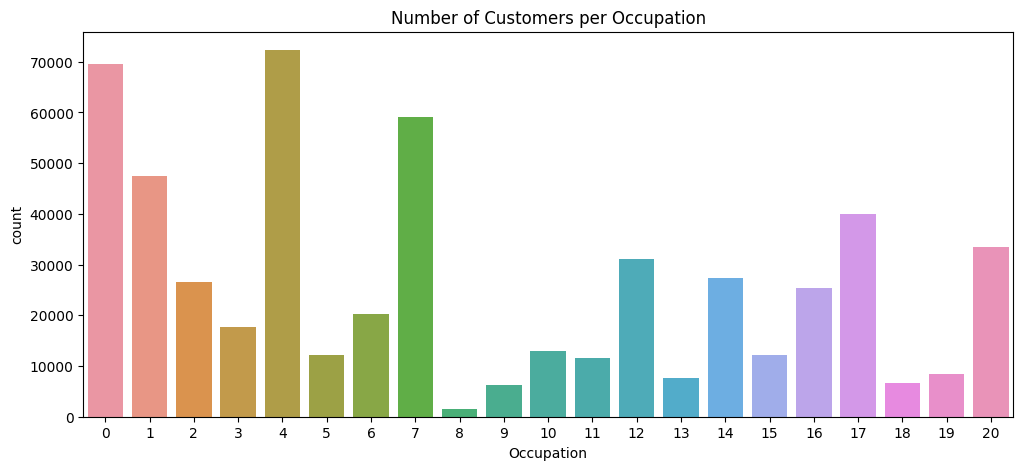

In [70]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='Occupation')
plt.title("Number of Customers per Occupation")
plt.show()

* There are 21 types of occupations and the most of the customers are having occupations 0, 1, 4, 7, 17 and 20.

In [71]:
data['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

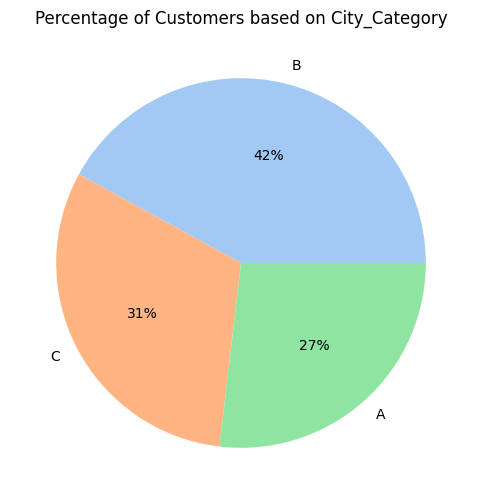

In [72]:
df = data['City_Category'].value_counts(normalize=True)*100

plt.figure(figsize = (12,6))
palette_color = sns.color_palette('pastel')
plt.pie(x=df.values, labels=df.index, autopct='%.0f%%', colors=palette_color)
plt.title("Percentage of Customers based on City_Category")
plt.show()

* 42% customers are from city B, 31% are from city C and 27% are from city A.

In [73]:
data['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

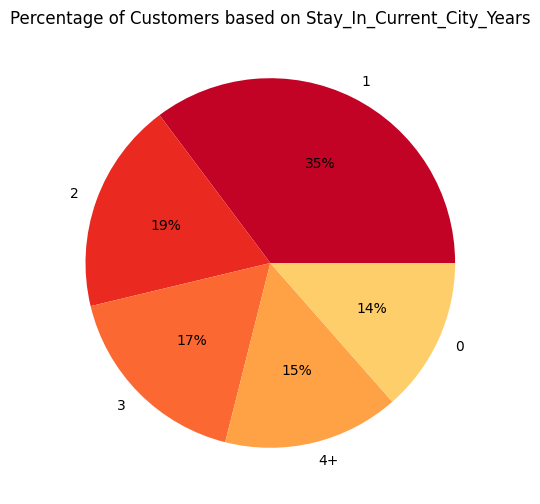

In [74]:
df = data['Stay_In_Current_City_Years'].value_counts(normalize=True)*100

plt.figure(figsize = (12,6))
palette_color = sns.color_palette('YlOrRd_r')
plt.pie(x=df.values, labels=df.index, autopct='%.0f%%', colors=palette_color)
plt.title("Percentage of Customers based on Stay_In_Current_City_Years")
plt.show()

* 35% Staying in the city from 1 year, 19% from 2 years, 17% from 3 years, 15% from 4+ years and 14% from less than 1 year.

In [75]:
data['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

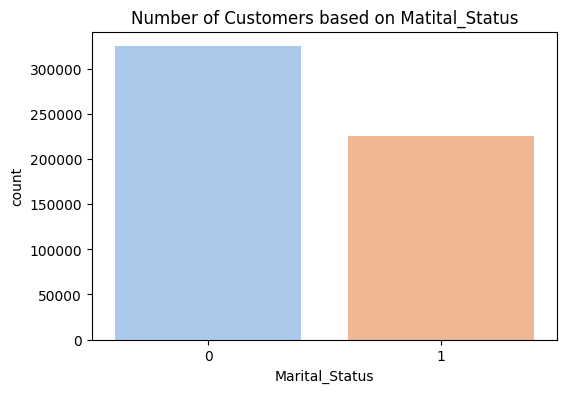

In [76]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Marital_Status', palette = 'pastel')
plt.title("Number of Customers based on Matital_Status")
plt.show()

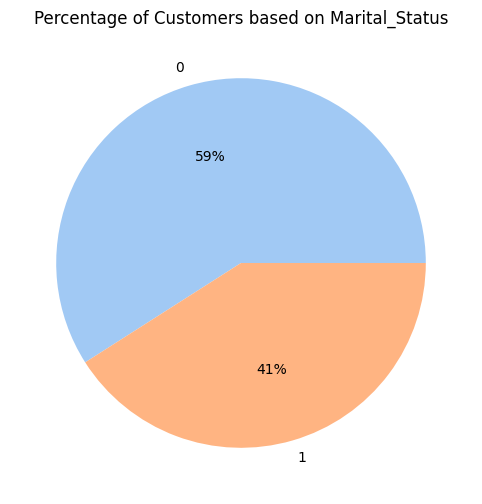

In [77]:
df = data['Marital_Status'].value_counts(normalize=True)*100

plt.figure(figsize = (12,6))
palette_color = sns.color_palette('pastel')
plt.pie(x=df.values, labels=df.index, autopct='%.0f%%', colors=palette_color)
plt.title("Percentage of Customers based on Marital_Status")
plt.show()

* 59% of customers are Single, 41% are Married.

In [78]:
data['Product_Category'].nunique()

20

In [79]:
data['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

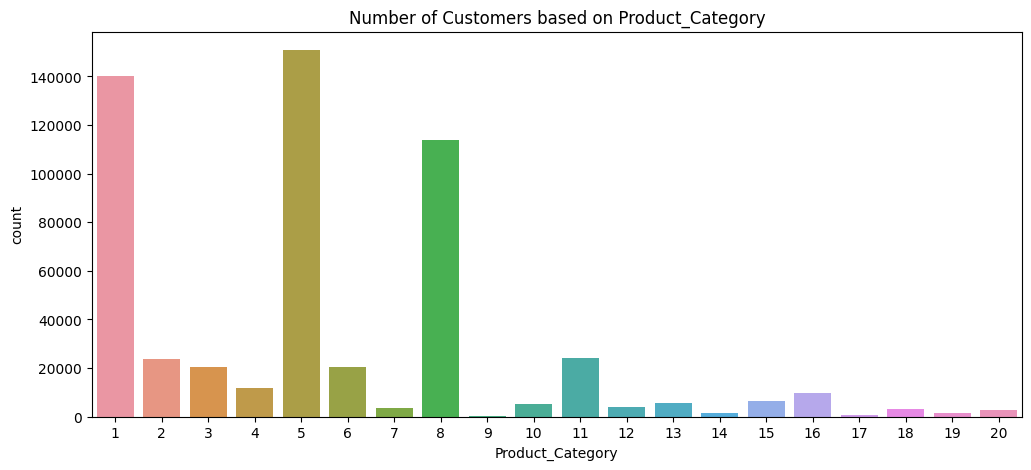

In [80]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='Product_Category')
plt.title("Number of Customers based on Product_Category")
plt.show()

* Total of 20 product categories are there and the product_categories 1, 5 & 8 are most selling products.

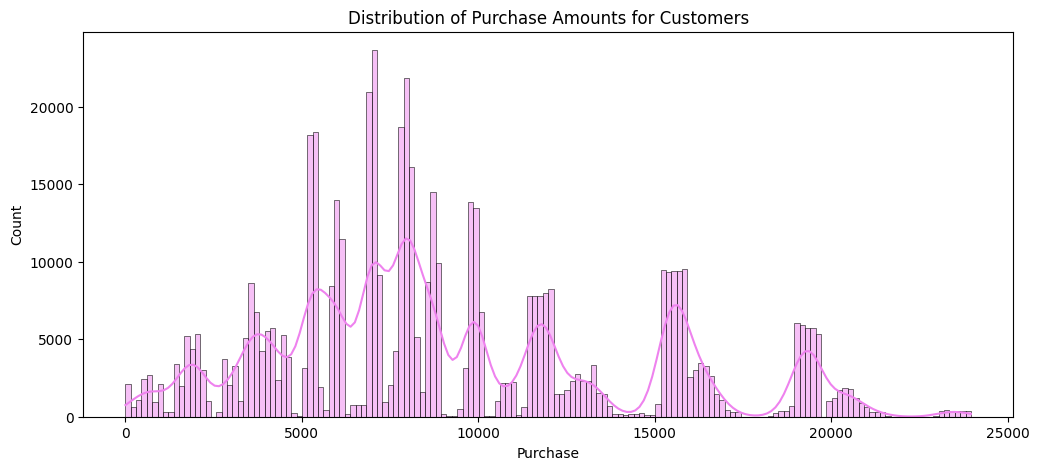

In [81]:
plt.figure(figsize=(12, 5))
sns.histplot(data=data, x = 'Purchase', kde = True, color = 'violet')
plt.title("Distribution of Purchase Amounts for Customers")
plt.show()

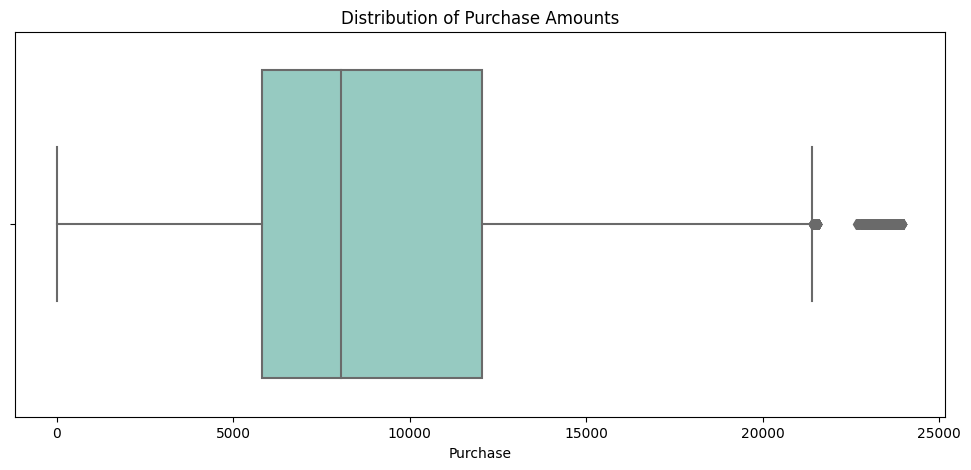

In [82]:
plt.figure(figsize=(12, 5))
sns.boxplot(data = data, x = 'Purchase', orient = 'h', palette = 'Set3')
plt.title("Distribution of Purchase Amounts")
plt.show()

* Purchase is not normally distributed(right skewed).
* There are some outliers in Purchase Column.

## Bivariate Analysis:

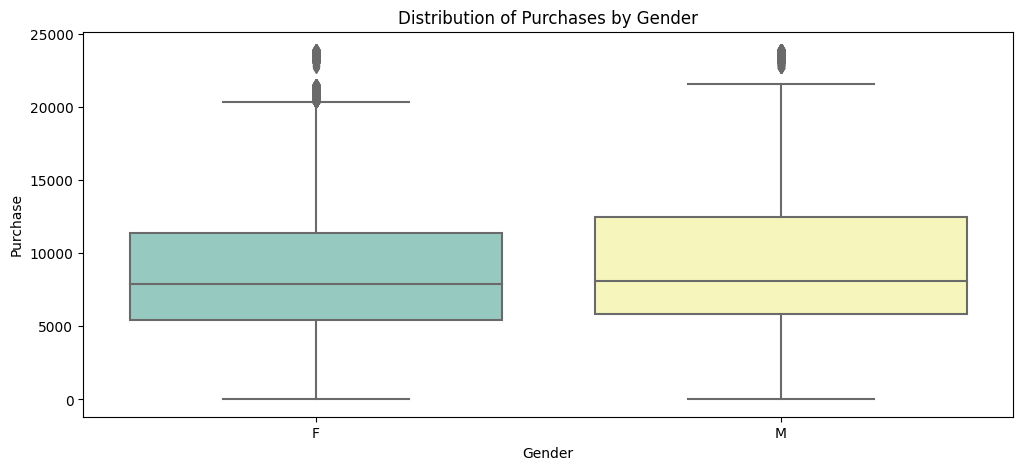

In [83]:
plt.figure(figsize = (12,5))
sns.boxplot(data = data, x = 'Gender', y = 'Purchase', palette = 'Set3')
plt.title('Distribution of Purchases by Gender')
plt.show()

* The male customers purchase amount is more than females although median purchase of male and female customers are equal.

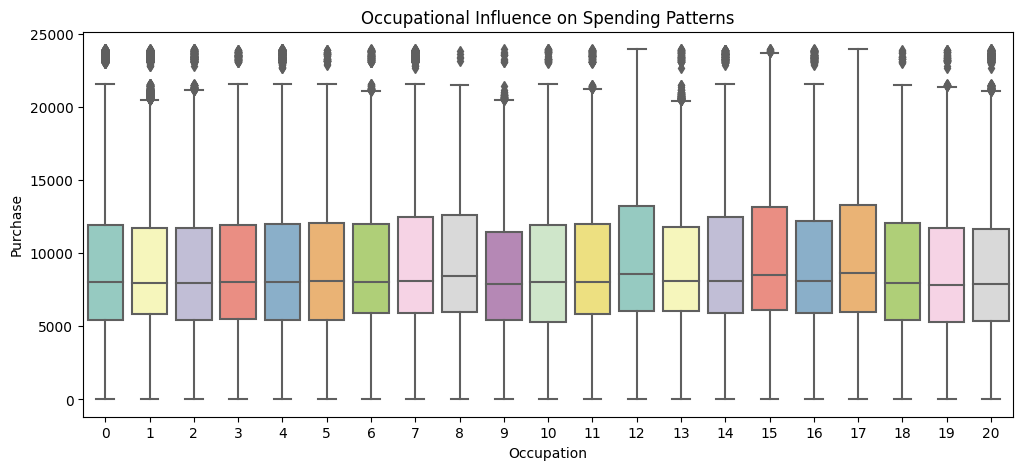

In [84]:
plt.figure(figsize = (12,5))
sns.boxplot(data = data, x = 'Occupation', y = 'Purchase', palette = 'Set3')
plt.title("Occupational Influence on Spending Patterns")
plt.show()

* The median purchase of customers having occupation 8, 12, 15, 17 are little higher than others. 

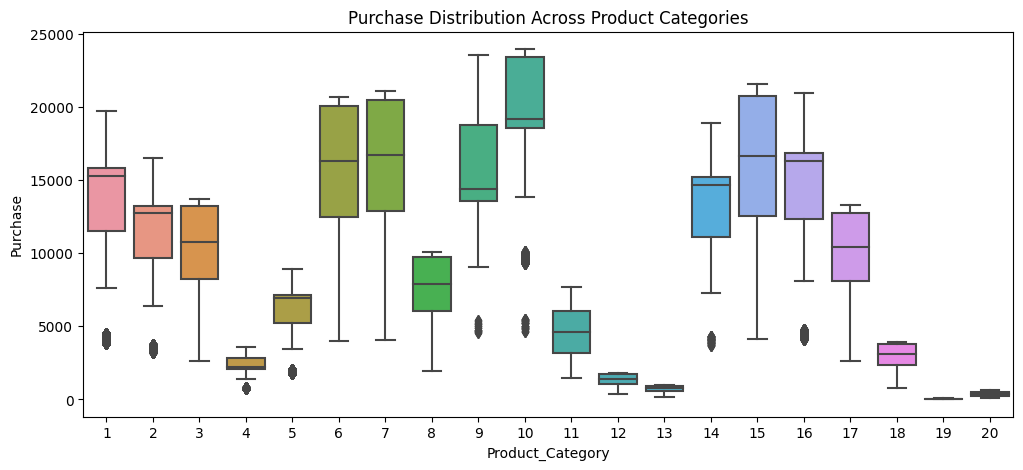

In [85]:
plt.figure(figsize = (12,5))
sns.boxplot(data = data, x = 'Product_Category', y = 'Purchase')
plt.title("Purchase Distribution Across Product Categories")
plt.show()

* The median purchase of product categories 10, 6, 7, 15 and 16 are higher than the other product categories.

## Multivariate Analysis:

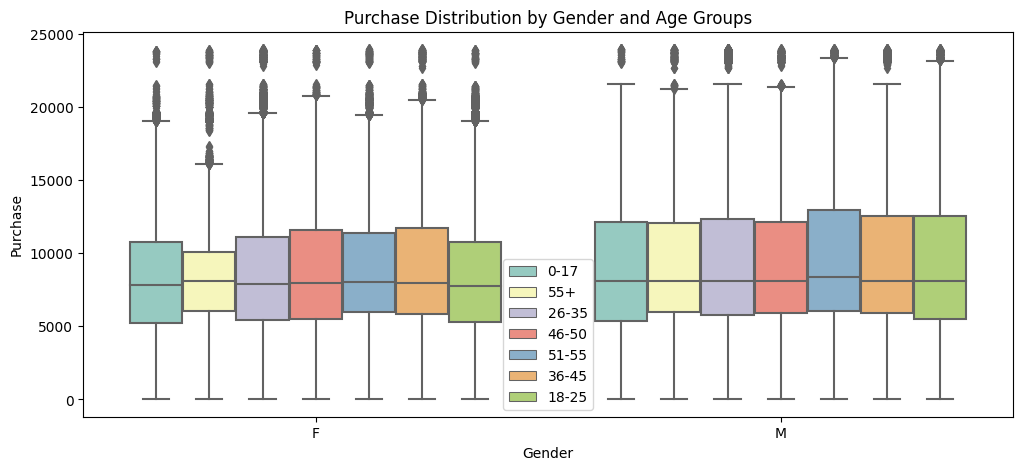

In [86]:
plt.figure(figsize = (12,5))
sns.boxplot(data = data, x = 'Gender', y = 'Purchase', hue = 'Age', palette = 'Set3')
plt.legend(loc = 'best')
plt.title("Purchase Distribution by Gender and Age Groups")
plt.show()

* The median purchase for age group 26-55 in females are higher than other females.
* The median purchase for age group 51-55 in males are highest than other males.

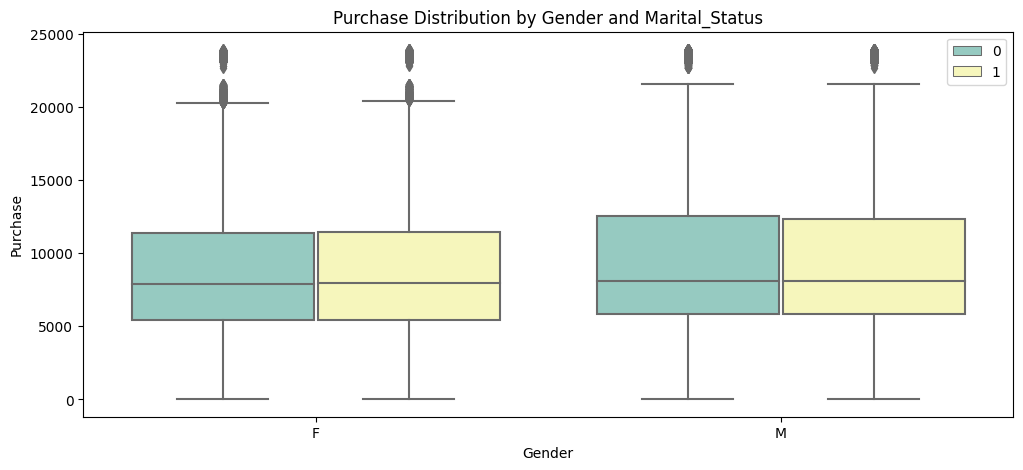

In [87]:
plt.figure(figsize = (12,5))
sns.boxplot(data = data, x = 'Gender', y = 'Purchase', hue = 'Marital_Status', palette = 'Set3')
plt.title("Purchase Distribution by Gender and Marital_Status")
plt.legend(loc = 'best')
plt.show()

In [88]:
df = data.groupby('Marital_Status')['Purchase'].mean()
df

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

* There is no diffference in median purchase of married vs unmarried male and female customers.
* The mean purchase of unmarried customers are little more than that of the married customers.

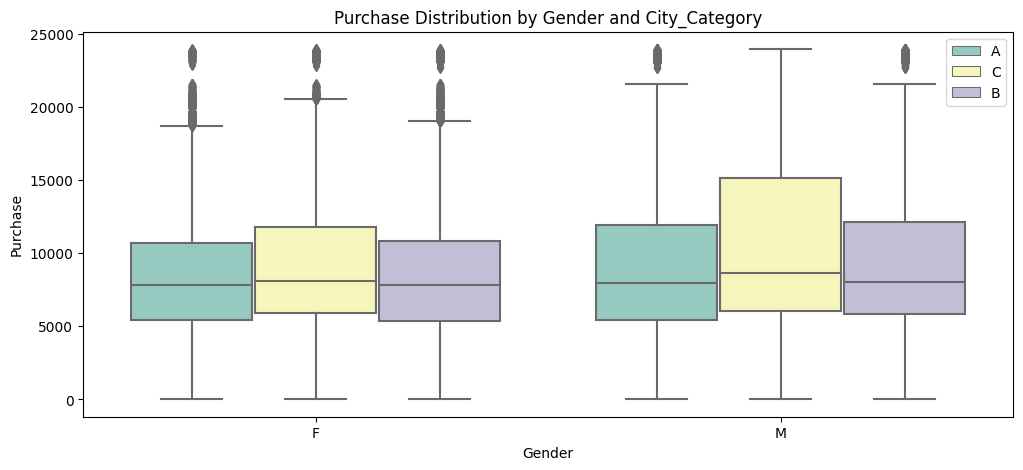

In [89]:
plt.figure(figsize = (12,5))
sns.boxplot(data = data, x = 'Gender', y = 'Purchase', hue = 'City_Category', palette = 'Set3')
plt.legend(loc = 'best')
plt.title("Purchase Distribution by Gender and City_Category")
plt.show()

* The median purchase of males and females from city C are more.

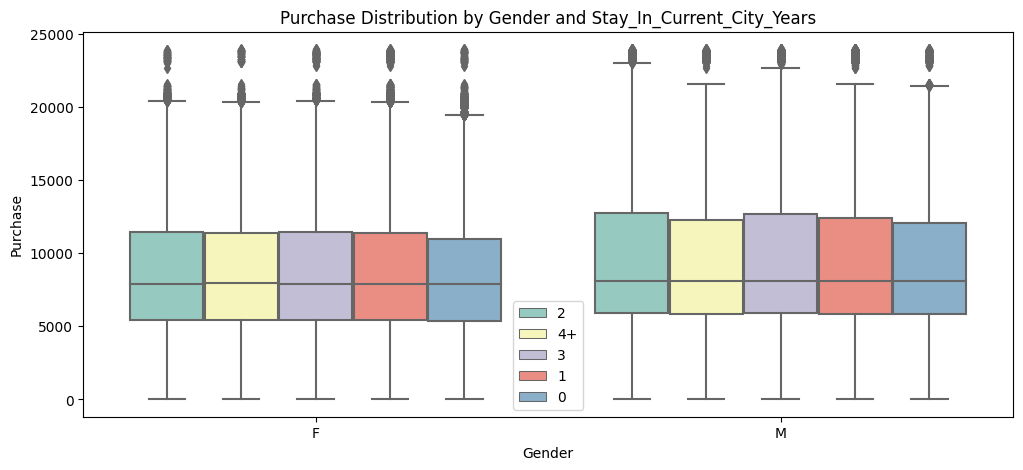

In [90]:
plt.figure(figsize = (12,5))
sns.boxplot(data = data, x = 'Gender', y = 'Purchase', hue = 'Stay_In_Current_City_Years', palette = 'Set3')
plt.legend(loc = 'best')
plt.title("Purchase Distribution by Gender and Stay_In_Current_City_Years")
plt.show()

In [91]:
df = data.groupby('Gender')['Purchase'].mean()
df

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

* The median purchase of male and female customers are almost equal but mean purchase of males is higher than females.

In [31]:
# heatmap

In [32]:
numerical_col = [i for i in data.columns if data[i].dtype == 'int64']
numerical_col

['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase']

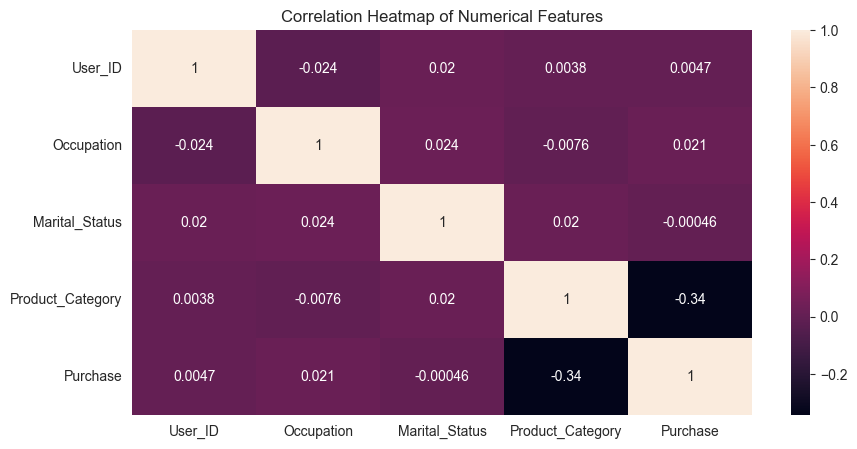

In [246]:
plt.figure(figsize = (10,5))
sns.heatmap(data[numerical_col].corr(), annot = True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

* Product_category and Purchase are negatively correlated.
* Purchase and Marital_Status are weakly positively correlated.

In [34]:
# pair plot

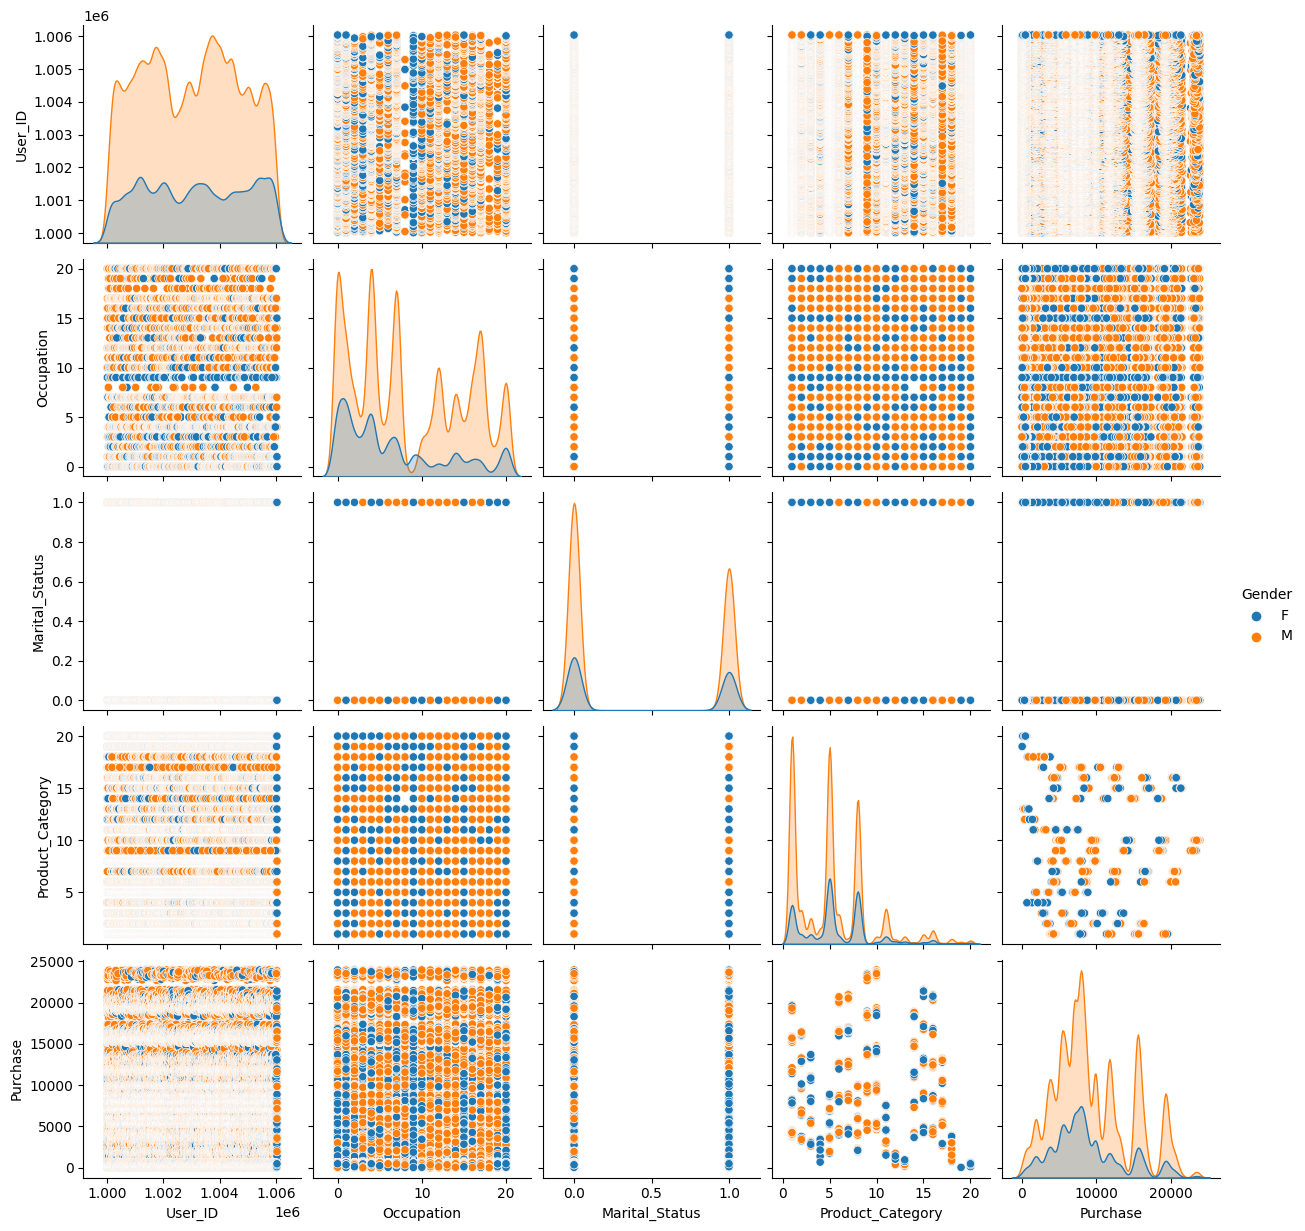

In [128]:
sns.pairplot(data = data, hue = 'Gender')
# plt.title("Pairwise Relationships in the Data by Gender")
plt.show()

* Male customers purchase frequency is more than that of Female customers.

# Computing the average male and female expenses & finding an interval within which the population average will lie:

In [15]:
# Filtering data for female and male customers

data_male = data[data['Gender'] == 'M']
data_female = data[data['Gender'] == 'F']

In [16]:
# Calculating the average amount spent per transaction for female customers
avg_amount_spent_per_male = data_male['Purchase'].mean()
print("Average spending per transaction for male customers: {:.2f}".format(avg_amount_spent_per_male))


# Calculating the average amount spent per transaction for female customers
avg_amount_spent_per_female = data_female['Purchase'].mean()
print("Average spending per transaction for female customers: {:.2f}".format(avg_amount_spent_per_female))

Average spending per transaction for male customers: 9437.53
Average spending per transaction for female customers: 8734.57


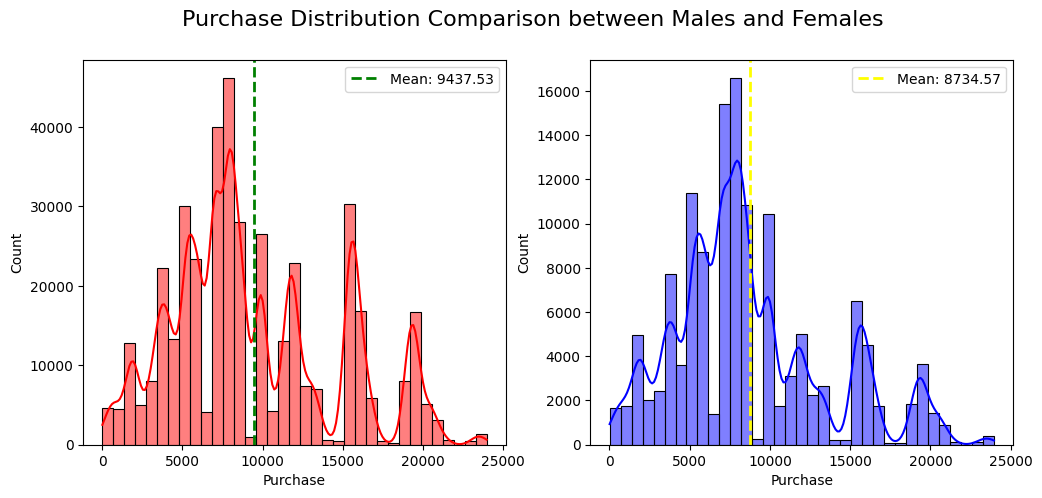

In [107]:
# Distribution of average amount spend for each customer - Male & Female

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle("Purchase Distribution Comparison between Males and Females", fontsize=16)

sns.histplot(data = data_male, x = 'Purchase', bins=35, kde = True, color = 'red', ax = axes[0])
sns.histplot(data = data_female, x = 'Purchase', bins=35, kde = True, color = 'blue', ax = axes[1])

# plotting the mean lines
axes[0].axvline(avg_amount_spent_per_male, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {avg_amount_spent_per_male:.2f}')
axes[1].axvline(avg_amount_spent_per_female, color='yellow', linestyle='dashed', linewidth=2, label=f'Mean: {avg_amount_spent_per_female:.2f}')

# Adding legend
axes[0].legend()
axes[1].legend()

plt.show()

* The average purchase of **Males (9437.53)** is more than that of **Females(8734.57)**.

In [108]:
# Assuming a confidence level of 95%
confidence_level = 0.95
z_score = norm.ppf(0.95)

# Calculate the standard deviation for female customers
std_dev_male = data_male['Purchase'].std()

# Calculate the margin of error
n = len(data_male)
margin_of_error = z_score * (std_dev_male / (np.sqrt(n)))

# Calculate the interval
lower_bound = avg_amount_spent_per_male - margin_of_error
upper_bound = avg_amount_spent_per_male + margin_of_error

print("Confidence Interval for the population average spending of male customers: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))

Confidence Interval for the population average spending of male customers: [9424.51, 9450.54]


* The population average purchase of **Males** lies in the interval **[9424.51, 9450.54]**.

In [109]:
# Assuming a confidence level of 95%
confidence_level = 0.95
z_score = norm.ppf(0.95)

# Calculate the standard deviation for female customers
std_dev_female = data_female['Purchase'].std()

# Calculate the margin of error
n = len(data_female)
margin_of_error = z_score * (std_dev_female / (np.sqrt(n)))

# Calculate the interval
lower_bound = avg_amount_spent_per_female - margin_of_error
upper_bound = avg_amount_spent_per_female + margin_of_error

print("Confidence Interval for the population average spending of female customers: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))

Confidence Interval for the population average spending of female customers: [8713.29, 8755.84]


* The population average purchase of **Females** lies in the interval **[8713.29, 8755.84]**.

## Defining a function to find Confidence interval using CLT:

In [21]:
# Setting the random seed for reproducibility
np.random.seed(42)

# Number of times to run for CLT
num_times = 1000

In [22]:
# Function to calculate confidence interval using CLT
def calculate_clt_confidence_interval(data, confidence_level):
    sample_means = []

    for _ in range(num_times):
        sample = np.random.choice(data['Purchase'], size = len(data), replace = True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)

    # Calculating standard error of the mean
    standard_error = np.std(sample_means, ddof = 1)

    # Calculating z-score based on confidence level
    z_score = norm.ppf((1 + confidence_level) / 2)
    
    # Calculate margin of error
    margin_of_error = z_score * standard_error

    # Calculate interval
    interval_lower = np.mean(sample_means) - margin_of_error
    interval_upper = np.mean(sample_means) + margin_of_error

    return [interval_lower, interval_upper]

### Confidence intervals using CLT and their overlapping for male and female customers:

#### For 90% Confidence Level:

In [23]:
# Calculate CLT confidence interval for male customers
CI_male = calculate_clt_confidence_interval(data_male, confidence_level=0.90)
print("CLT Confidence Interval for the population average spending of male customers: [{:.2f}, {:.2f}]".format(CI_male[0], CI_male[1]))

# Calculate CLT confidence interval for female customers
CI_female = calculate_clt_confidence_interval(data_female, confidence_level=0.90)
print("CLT Confidence Interval for the population average spending of female customers: [{:.2f}, {:.2f}]".format(CI_female[0], CI_female[1]))

CLT Confidence Interval for the population average spending of male customers: [9424.70, 9450.95]
CLT Confidence Interval for the population average spending of female customers: [8712.72, 8756.17]


In [24]:
# Checking if the confidence intervals overlap

if (CI_male[1] >= CI_female[0] and CI_female[1] >= CI_male[0]) or (CI_female[1] >= CI_male[0] and CI_male[1] >= CI_female[0]):
    print("Confidence intervals overlap, no significant difference.")
else:
    print("Confidence intervals do not overlap, there may be a significant difference.")

Confidence intervals do not overlap, there may be a significant difference.


#### For 95% Confidence Level:

In [25]:
# Calculate CLT confidence interval for male customers
CI_male = calculate_clt_confidence_interval(data_male, confidence_level=0.95)
print("CLT Confidence Interval for the population average spending of male customers: [{:.2f}, {:.2f}]".format(CI_male[0], CI_male[1]))

# Calculate CLT confidence interval for female customers
CI_female = calculate_clt_confidence_interval(data_female, confidence_level=0.95)
print("CLT Confidence Interval for the population average spending of female customers: [{:.2f}, {:.2f}]".format(CI_female[0], CI_female[1]))

CLT Confidence Interval for the population average spending of male customers: [9423.12, 9452.27]
CLT Confidence Interval for the population average spending of female customers: [8710.08, 8760.24]


In [26]:
# Checking if the confidence intervals overlap

if (CI_male[1] >= CI_female[0] and CI_female[1] >= CI_male[0]) or (CI_female[1] >= CI_male[0] and CI_male[1] >= CI_female[0]):
    print("Confidence intervals overlap, no significant difference.")
else:
    print("Confidence intervals do not overlap, there may be a significant difference.")

Confidence intervals do not overlap, there may be a significant difference.


#### For 99% Confidence Level:

In [27]:
# Calculate CLT confidence interval for male customers
CI_male = calculate_clt_confidence_interval(data_male, confidence_level=0.99)
print("CLT Confidence Interval for the population average spending of male customers: [{:.2f}, {:.2f}]".format(CI_male[0], CI_male[1]))

# Calculate CLT confidence interval for female customers
CI_female = calculate_clt_confidence_interval(data_female, confidence_level=0.99)
print("CLT Confidence Interval for the population average spending of female customers: [{:.2f}, {:.2f}]".format(CI_female[0], CI_female[1]))

CLT Confidence Interval for the population average spending of male customers: [9417.08, 9458.30]
CLT Confidence Interval for the population average spending of female customers: [8702.28, 8766.90]


In [28]:
# Checking if the confidence intervals overlap

if (CI_male[1] >= CI_female[0] and CI_female[1] >= CI_male[0]) or (CI_female[1] >= CI_male[0] and CI_male[1] >= CI_female[0]):
    print("Confidence intervals overlap, no significant difference.")
else:
    print("Confidence intervals do not overlap, there may be a significant difference.")

Confidence intervals do not overlap, there may be a significant difference.


* **Since Confidence intervals for confidence levels 90%, 95% and 99% do not overlap, there may be a significant difference in the purchase average of the Male and Female.**

## Computing the average expense for married and unmarried customers:

In [34]:
# Filtering data for married and unmarried customers

data_married = data[data['Marital_Status'] == 1]
data_unmarried = data[data['Marital_Status'] == 0]

In [35]:
# Calculating the average amount spent per transaction for married customers
avg_amount_spent_per_married = data_married['Purchase'].mean()
print("Average spending per transaction for married customers: {:.2f}".format(avg_amount_spent_per_married))


# Calculating the average amount spent per transaction for unmarried customers
avg_amount_spent_per_unmarried = data_unmarried['Purchase'].mean()
print("Average spending per transaction for unmarried customers: {:.2f}".format(avg_amount_spent_per_unmarried))

Average spending per transaction for married customers: 9261.17
Average spending per transaction for unmarried customers: 9265.91


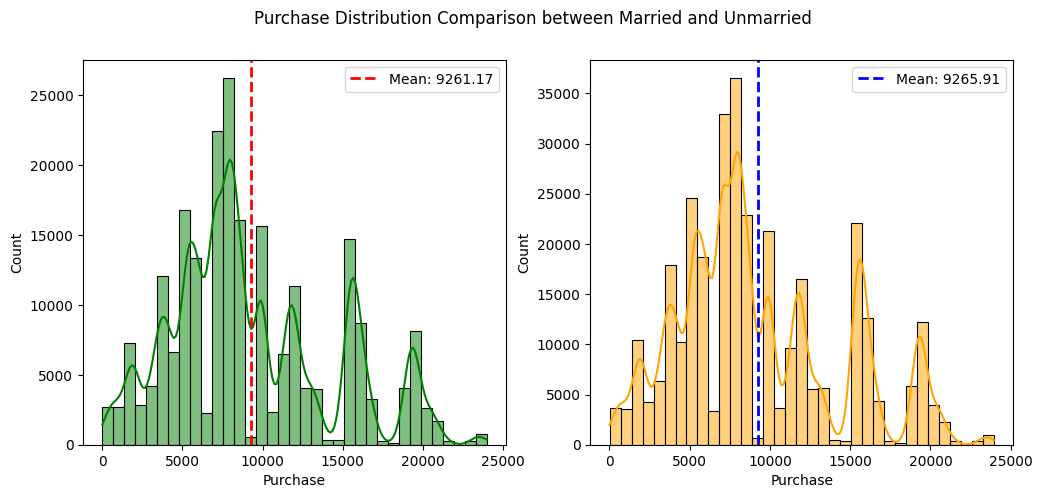

In [36]:
# Distribution of average amount spend for each customer - Married & Unmarried

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle("Purchase Distribution Comparison between Married and Unmarried")

sns.histplot(data = data_married, x = 'Purchase', bins=35, kde = True, color = 'green', ax = axes[0])
sns.histplot(data = data_unmarried, x = 'Purchase', bins=35, kde = True, color = 'orange', ax = axes[1])

# plotting the mean lines
axes[0].axvline(avg_amount_spent_per_married, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {avg_amount_spent_per_married:.2f}')
axes[1].axvline(avg_amount_spent_per_unmarried, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {avg_amount_spent_per_unmarried:.2f}')

# Adding legend
axes[0].legend()
axes[1].legend()

plt.show()

- Average spending per transaction for **married** customers is **9261.17**.
- Average spending per transaction for **unmarried** customers is **9265.91**.
- So, average spending of unmarried customers is more than that of married customers.

### Confidence intervals using CLT and their overlapping for married and unmarried customers:

In [37]:
# Calculate CLT confidence interval for married customers
CI_married = calculate_clt_confidence_interval(data_married, confidence_level=0.95)
print("CLT Confidence Interval for the population average spending of married customers: [{:.2f}, {:.2f}]".format(CI_married[0], CI_married[1]))

# Calculate CLT confidence interval for unmarried customers
CI_unmarried = calculate_clt_confidence_interval(data_unmarried, confidence_level=0.95)
print("CLT Confidence Interval for the population average spending of unmarried customers: [{:.2f}, {:.2f}]".format(CI_unmarried[0], CI_unmarried[1]))

CLT Confidence Interval for the population average spending of married customers: [9240.75, 9282.60]
CLT Confidence Interval for the population average spending of unmarried customers: [9248.81, 9283.55]


In [38]:
# Checking if the confidence intervals overlap

if (CI_married[1] >= CI_unmarried[0] and CI_unmarried[1] >= CI_married[0]) or (CI_unmarried[1] >= CI_married[0] and CI_married[1] >= CI_unmarried[0]):
    print("Confidence intervals overlap, no significant difference.")
else:
    print("Confidence intervals do not overlap, there may be a significant difference.")

Confidence intervals overlap, no significant difference.


* **Since Confidence intervals for confidence level 95% do not overlap, there may be a significant difference in the purchase average of the Married and Unmarried customers.**

## Computing the average expense for different age group customers:

In [123]:
# Filtering data for different age group customers

data_minor = data[data['Age'] == '0-17']
data_young_adult = data[data['Age'] == '18-25']
data_adult = data[data['Age'] == '26-35']
data_mid_adult = data[data['Age'] == '36-45']
data_middle_aged = data[data['Age'] == '46-50']
data_pre_retirement = data[data['Age'] == '51-55']
data_elderly = data[data['Age'] == '55+']

In [124]:
# Calculating the average amount spent per transaction for minor customers
avg_amount_spent_per_minor = data_minor['Purchase'].mean()
print("Average spending per transaction for minor customers: {:.2f}".format(avg_amount_spent_per_minor))


# Calculating the average amount spent per transaction for young_adult customers
avg_amount_spent_per_young_adult = data_young_adult['Purchase'].mean()
print("Average spending per transaction for young_adult customers: {:.2f}".format(avg_amount_spent_per_young_adult))


# Calculating the average amount spent per transaction for adult customers
avg_amount_spent_per_adult = data_adult['Purchase'].mean()
print("Average spending per transaction for adult customers: {:.2f}".format(avg_amount_spent_per_adult))


# Calculating the average amount spent per transaction for mid_adult customers
avg_amount_spent_per_mid_adult = data_mid_adult['Purchase'].mean()
print("Average spending per transaction for mid_adult customers: {:.2f}".format(avg_amount_spent_per_mid_adult))


# Calculating the average amount spent per transaction for middle_aged customers
avg_amount_spent_per_middle_aged = data_middle_aged['Purchase'].mean()
print("Average spending per transaction for middle_aged customers: {:.2f}".format(avg_amount_spent_per_middle_aged))


# Calculating the average amount spent per transaction for pre_retirement customers
avg_amount_spent_per_pre_retirement = data_pre_retirement['Purchase'].mean()
print("Average spending per transaction for pre_retirement customers: {:.2f}".format(avg_amount_spent_per_pre_retirement))


# Calculating the average amount spent per transaction for elderly customers
avg_amount_spent_per_elderly = data_elderly['Purchase'].mean()
print("Average spending per transaction for elderly customers: {:.2f}".format(avg_amount_spent_per_elderly))

Average spending per transaction for minor customers: 8933.46
Average spending per transaction for young_adult customers: 9169.66
Average spending per transaction for adult customers: 9252.69
Average spending per transaction for mid_adult customers: 9331.35
Average spending per transaction for middle_aged customers: 9208.63
Average spending per transaction for pre_retirement customers: 9534.81
Average spending per transaction for elderly customers: 9336.28


* The average spending of mid_adult customers **(age_group: 36-45)** is **maximum**.
* The average spending of minor customers **(age_group: 0-17)** is **minimum**.

### Confidence intervals using CLT and overlapping of CI for different age group customers:

In [125]:
# Calculate CLT confidence interval for minor customers
CI_minor = calculate_clt_confidence_interval(data_minor, confidence_level=0.95)
print("CLT Confidence Interval for the population average spending of minor customers: [{:.2f}, {:.2f}]".format(CI_minor[0], CI_minor[1]))

# Calculate CLT confidence interval for young_adult customers
CI_young_adult = calculate_clt_confidence_interval(data_young_adult, confidence_level=0.95)
print("CLT Confidence Interval for the population average spending of young_adult customers: [{:.2f}, {:.2f}]".format(CI_young_adult[0], CI_young_adult[1]))

# Calculate CLT confidence interval for adult customers
CI_adult = calculate_clt_confidence_interval(data_adult, confidence_level=0.95)
print("CLT Confidence Interval for the population average spending of adult customers: [{:.2f}, {:.2f}]".format(CI_adult[0], CI_adult[1]))

# Calculate CLT confidence interval for mid_adult customers
CI_mid_adult = calculate_clt_confidence_interval(data_mid_adult, confidence_level=0.95)
print("CLT Confidence Interval for the population average spending of mid_adult customers: [{:.2f}, {:.2f}]".format(CI_mid_adult[0], CI_mid_adult[1]))

# Calculate CLT confidence interval for middle_aged customers
CI_middle_aged = calculate_clt_confidence_interval(data_middle_aged, confidence_level=0.95)
print("CLT Confidence Interval for the population average spending of middle_aged customers: [{:.2f}, {:.2f}]".format(CI_middle_aged[0], CI_middle_aged[1]))

# Calculate CLT confidence interval for pre_retirement customers
CI_pre_retirement = calculate_clt_confidence_interval(data_pre_retirement, confidence_level=0.95)
print("CLT Confidence Interval for the population average spending of pre_retirement customers: [{:.2f}, {:.2f}]".format(CI_pre_retirement[0], CI_pre_retirement[1]))

# Calculate CLT confidence interval for elderly customers
CI_elderly = calculate_clt_confidence_interval(data_elderly, confidence_level=0.95)
print("CLT Confidence Interval for the population average spending of elderly customers: [{:.2f}, {:.2f}]".format(CI_elderly[0], CI_elderly[1]))

CLT Confidence Interval for the population average spending of minor customers: [8852.58, 9010.16]
CLT Confidence Interval for the population average spending of young_adult customers: [9138.10, 9201.04]
CLT Confidence Interval for the population average spending of adult customers: [9231.80, 9273.26]
CLT Confidence Interval for the population average spending of mid_adult customers: [9301.85, 9362.38]
CLT Confidence Interval for the population average spending of middle_aged customers: [9162.69, 9254.78]
CLT Confidence Interval for the population average spending of pre_retirement customers: [9481.30, 9585.34]
CLT Confidence Interval for the population average spending of elderly customers: [9271.05, 9402.32]


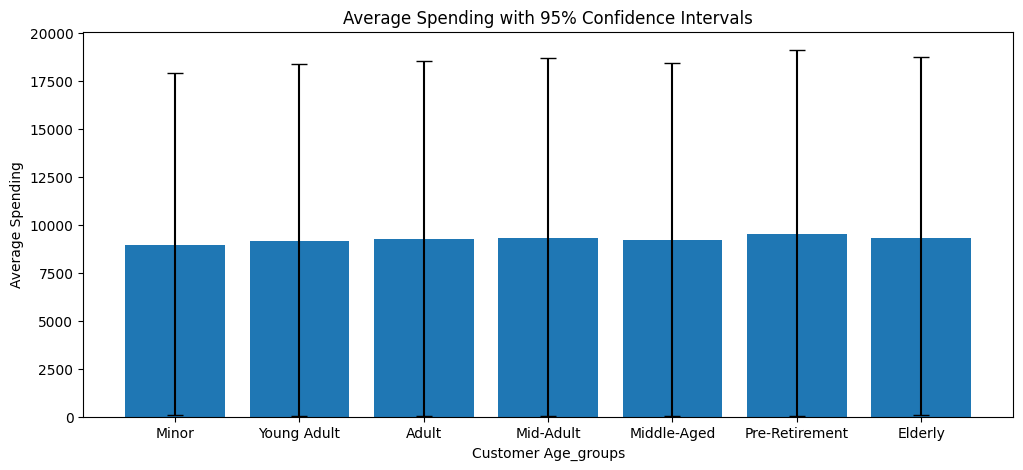

In [127]:
age_groups = ["Minor", "Young Adult", "Adult", "Mid-Adult", "Middle-Aged", "Pre-Retirement", "Elderly"]
avg_spending = [avg_amount_spent_per_minor, avg_amount_spent_per_young_adult, avg_amount_spent_per_adult, avg_amount_spent_per_mid_adult, avg_amount_spent_per_middle_aged, avg_amount_spent_per_pre_retirement, avg_amount_spent_per_elderly]
confidence_intervals = [CI_minor, CI_young_adult, CI_adult, CI_mid_adult, CI_middle_aged, CI_pre_retirement, CI_elderly]

# Extracting lower and upper bounds of confidence intervals
lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

# Plotting the bar plot with error bars
plt.figure(figsize = (12,5))
plt.bar(age_groups, avg_spending, yerr =[lower_bounds, upper_bounds], capsize=6)
plt.title('Average Spending with 95% Confidence Intervals')
plt.xlabel('Customer Age_groups')
plt.ylabel('Average Spending')
plt.show()

* **Since Confidence intervals for confidence levels 95% are overlapping, there may not be a significant difference in the purchase average of the different Age_Group customers.**

# Insights:

* There are 5891 users and 3631 products in the dataset.
* 75% of the users are Male and 25% are Female.
* 86% of the users are between the age 18-50 (18%: 18-25, 40%: 26-35, 20%: 36-45, 8%: 46-50).
* 42% customers are from city B, 31% are from city C and 27% are from city A.
* 35% Staying in the city from 1 year, 19% from 2 years, 17% from 3 years, 15% from 4+ years and 14% from less than 1 year.
* 59% of customers are Single, 41% are Married.
* Total of 20 product categories are there and the product_categories 1, 5 & 8 are most selling products.

* The median purchase of customers having occupation 8, 12, 15, 17 are little higher than others. 
* The median purchase of product categories 10, 6, 7, 15 and 16 are higher than the other product categories.

* There is no diffference in median purchase of married vs unmarried male and female customers.
* The mean purchase of unmarried customers are little more than that of the married customers.

* The median purchase of males and females from city C are more.
* The median purchase of male and female customers are almost equal but mean purchase of males is higher than females.
* The purchase frequency of males is more than females.

* Product_category and Purchase are negatively correlated.
* Purchase and Marital_Status are weakly positively correlated.

* Average spending per transaction for male customers is 9437.53.
* Average spending per transaction for female customers is 8734.57.
* CLT Confidence Interval (Confidence Level = 95%) for the population average spending of male customers: [9423.12, 9452.27]
* CLT Confidence Interval (Confidence Level = 95%) for the population average spending of female customers: [8710.08, 8760.24]
* Since Confidence intervals for confidence levels 90%, 95% and 99% do not overlap, there may be a significant difference in the purchase average of the Male and Female.

* Average spending per transaction for married customers: 9261.17.
* Average spending per transaction for unmarried customers: 9265.91.
* CLT Confidence Interval (Confidence Level = 95%) for the population average spending of married customers: [9241.60, 9281.42]
* CLT Confidence Interval (Confidence Level = 95%) for the population average spending of unmarried customers: [9248.38, 9284.05.
* Since Confidence intervals for confidence level 95% do not overlap, there may be a significant difference in the purchase average of the Married and Unmarried customers.

* The average spending of mid_adult customers(age_group: 36-45) is maximum.
* The average spending of minor customers(age_group: 0-17) is minimum.
* Since Confidence intervals for confidence levels 95% are overlapping, there may not be a significant difference in the purchase average of the different Age_Group customers.

# Recommendations:

* Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
* Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
* Customers in the age 18-50 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
* Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.